In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy

plt.style.use('Solarize_Light2')

In [2]:
names = ['sep_len', 'sep_wth', 'pet_len', 'pet_wth', 'class']
iris_df = pd.read_csv('iris.data', names=names)

In [3]:
iris_df

,sep_len,sep_wth,pet_len,pet_wth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# check for missed data
iris_df.isnull().sum()

sep_len    0
sep_wth    0
pet_len    0
pet_wth    0
class      0
dtype: int64

In [5]:
iris_df['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

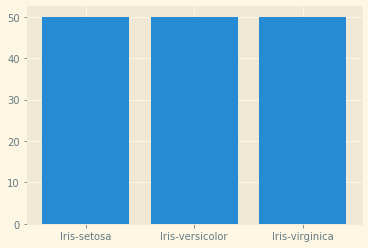

In [6]:
plt.bar(iris_df['class'].unique(), iris_df['class'].value_counts())

plt.show()

In [7]:
virginica = iris_df[iris_df['class'] == 'Iris-virginica']
setosa = iris_df[iris_df['class'] == 'Iris-setosa']
versicolor = iris_df[iris_df['class'] == 'Iris-versicolor']

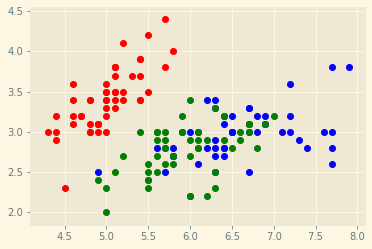

In [8]:
plt.scatter(virginica['sep_len'], virginica['sep_wth'], color='blue')
plt.scatter(setosa['sep_len'], setosa['sep_wth'], color='red')
plt.scatter(versicolor['sep_len'], versicolor['sep_wth'], color='green')

plt.show()

In [9]:
def plot_scatter(axs, col_name_1 , col_name_2):
    axs.scatter(virginica[col_name_1], virginica[col_name_2], color='blue', label='virginica')
    axs.scatter(setosa[col_name_1], setosa[col_name_2], color='red', label='setosa')
    axs.scatter(versicolor[col_name_1], versicolor[col_name_2], color='green', label='versicolor')
    axs.legend()

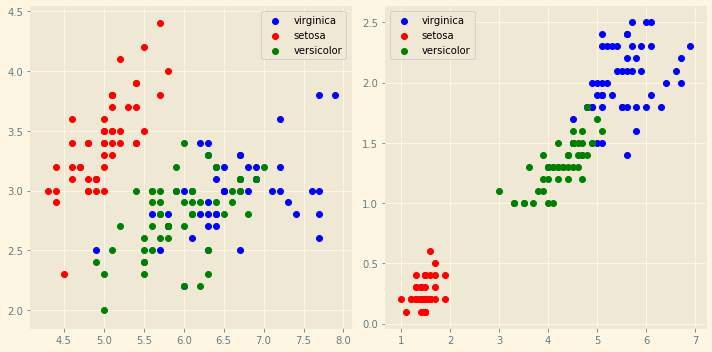

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plot_scatter(axs[0], 'sep_len', 'sep_wth')
plot_scatter(axs[1], 'pet_len', 'pet_wth')

fig.tight_layout()
plt.show()

/home/rlllok/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


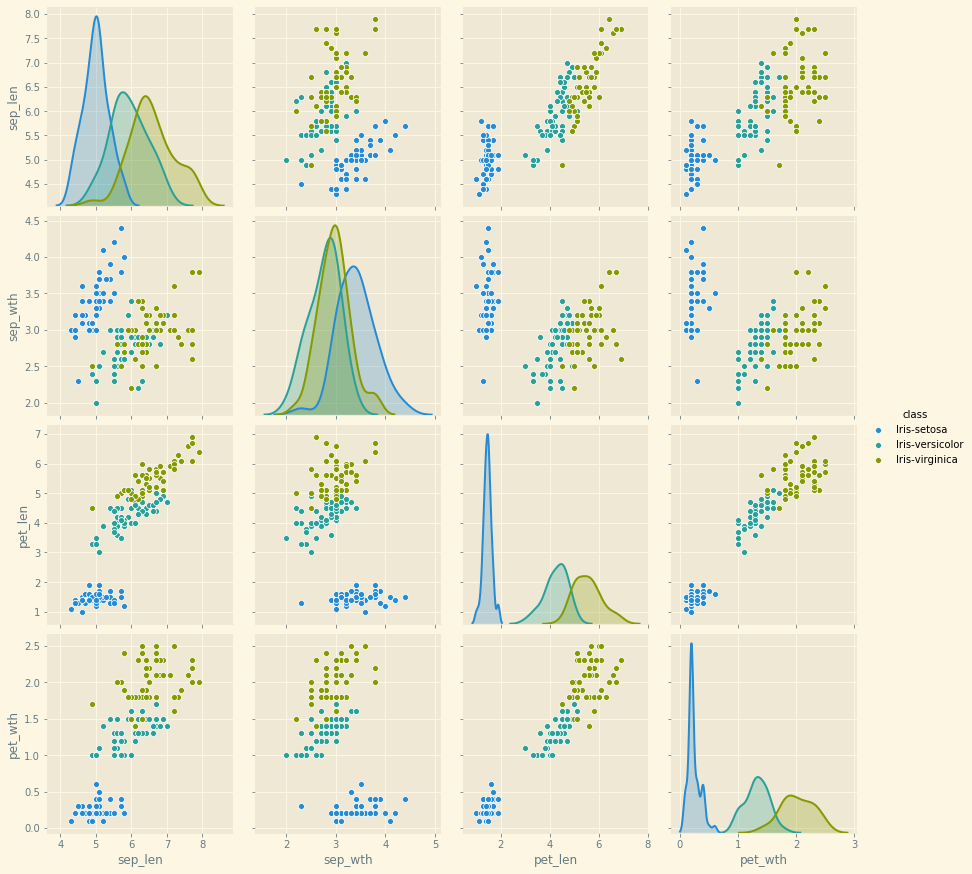

In [11]:
sns.pairplot(iris_df, hue="class", size=3)

In [12]:
iris_df.corr()

,sep_len,sep_wth,pet_len,pet_wth
sep_len,1.000000,-0.109369,0.871754,0.817954
sep_wth,-0.109369,1.000000,-0.420516,-0.356544
pet_len,0.871754,-0.420516,1.000000,0.962757
pet_wth,0.817954,-0.356544,0.962757,1.000000


In [13]:
# chacnge categorical feature to number
iris_temp = iris_df
iris_temp['class'] = iris_temp['class'].astype('category')
iris_temp['class'] = iris_temp['class'].cat.codes

In [39]:
class KNN:
    
    def __init__(self):
        pass
    
    def distance(self, point1, point2):
        return np.sqrt(np.sum(np.power(point1 - point2, 2)))
    
    def fit(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data
        
    def predict(self, data, k):
        result = []
        for point in data:
            distances = np.array([self.distance(point, x_data_point) for x_data_point in self.x_data])
            k_nearest_class = scipy.stats.mode(self.y_data[distances.argsort()[:k]])[0][0]
            result.append(k_nearest_class)
        return np.array(result)

In [40]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [46]:
X_train, X_test, y_train, y_test = train_test_split(iris_temp.iloc[:, :-1].values, iris_temp.iloc[:, -1].values, test_size=0.3)

In [47]:
model = KNN()
model.fit(X_train, y_train)
prediction = model.predict(X_test, k=5)

In [50]:
print("KNN accuracy:", metrics.accuracy_score(prediction, y_test))

KNN accuracy: 0.9555555555555556


In [54]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_prediction = log_model.predict(X_test)
print("LogRegression accuracy", metrics.accuracy_score(log_prediction, y_test))

LogRegression accuracy 0.9777777777777777


/home/rlllok/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [55]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_prediction = tree_model.predict(X_test)
print("DicisionTree accuracy", metrics.accuracy_score(tree_prediction, y_test))

DicisionTree accuracy 0.9111111111111111
